<a href="https://colab.research.google.com/github/Jai-Bhagwan/-Library-Management-System-Python-DSA-/blob/main/MNIST_Handwritten_Digit_Recognition_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## MNIST Handwritten Digit Recognition

This project aims to classify handwritten digits (0-9) using a Convolutional Neural Network (CNN) with TensorFlow/Keras. This is a classic 'hello world' for computer vision tasks and a great way to start with CNNs.

In [6]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

### 1. Load and Preprocess the MNIST Dataset

The MNIST dataset consists of 60,000 training images and 10,000 testing images. Each image is a 28x28 grayscale image of a handwritten digit.

In [7]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Display the shape of the dataset
print(f"Original training data shape: {x_train.shape}")
print(f"Original testing data shape: {x_test.shape}")

# Reshape the data to add a channel dimension (for CNNs, grayscale images have 1 channel)
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

# Convert pixel values to float32 and normalize to [0, 1]
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# Convert class vectors to binary class matrices (one-hot encoding)
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

print(f"Preprocessed training data shape: {x_train.shape}")
print(f"Preprocessed testing data shape: {x_test.shape}")
print(f"Preprocessed training labels shape: {y_train.shape}")
print(f"Preprocessed testing labels shape: {y_test.shape}")

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Original training data shape: (60000, 28, 28)
Original testing data shape: (10000, 28, 28)
Preprocessed training data shape: (60000, 28, 28, 1)
Preprocessed testing data shape: (10000, 28, 28, 1)
Preprocessed training labels shape: (60000, 10)
Preprocessed testing labels shape: (10000, 10)


### 2. Visualize Sample Images

Let's display a few sample images from the dataset to understand what we're working with.

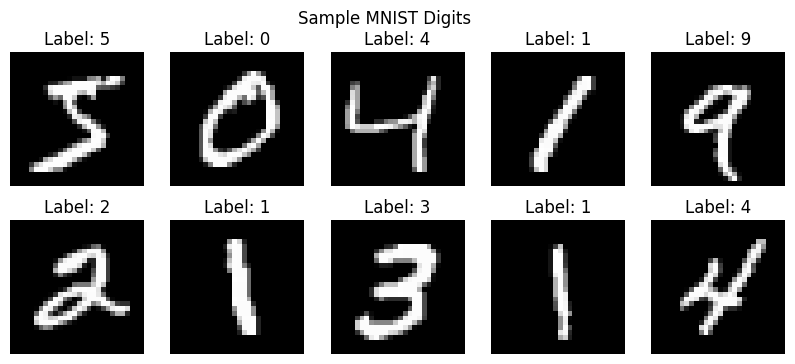

In [8]:
plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[i].reshape(28, 28), cmap='gray')
    plt.title(f"Label: {np.argmax(y_train[i])}")
    plt.axis('off')
plt.suptitle('Sample MNIST Digits')
plt.show()

### 3. Build the CNN Model

We'll create a simple CNN model with a few convolutional and pooling layers, followed by dense layers for classification.

In [9]:
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

### 4. Compile the Model

We'll use the Adam optimizer, categorical cross-entropy loss (since we have one-hot encoded labels), and accuracy as a metric.

In [10]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
print("Model compiled successfully!")

Model compiled successfully!


### 5. Train the Model

Now, let's train our CNN model using the training data.

In [11]:
batch_size = 128
epochs = 10

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))

print("Model training complete!")

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 51s 104ms/step - accuracy: 0.8016 - loss: 0.6344 - val_accuracy: 0.9803 - val_loss: 0.0619
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 46s 98ms/step - accuracy: 0.9678 - loss: 0.1060 - val_accuracy: 0.9856 - val_loss: 0.0425
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 46s 99ms/step - accuracy: 0.9783 - loss: 0.0756 - val_accuracy: 0.9887 - val_loss: 0.0346
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 45s 96ms/step - accuracy: 0.9807 - loss: 0.0634 - val_accuracy: 0.9915 - val_loss: 0.0273
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 46s 99ms/step - accuracy: 0.9845 - loss: 0.0511 - val_accuracy: 0.9910 - val_loss: 0.0273
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 46s 99ms/step - accuracy: 0.9872 - loss: 0.0450 - val_accuracy: 0.9896 - val_loss: 0.0318
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 83s 100ms/step - accuracy: 0.9864 - loss: 0.0440 - val_accuracy: 0.9914 - val_loss: 0.0252
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 47s 100ms/step - accuracy: 0.9895 - loss: 0.0346

### 6. Evaluate the Model

Finally, let's evaluate the model's performance on the test set.

Test loss: 0.0238
Test accuracy: 99.23%


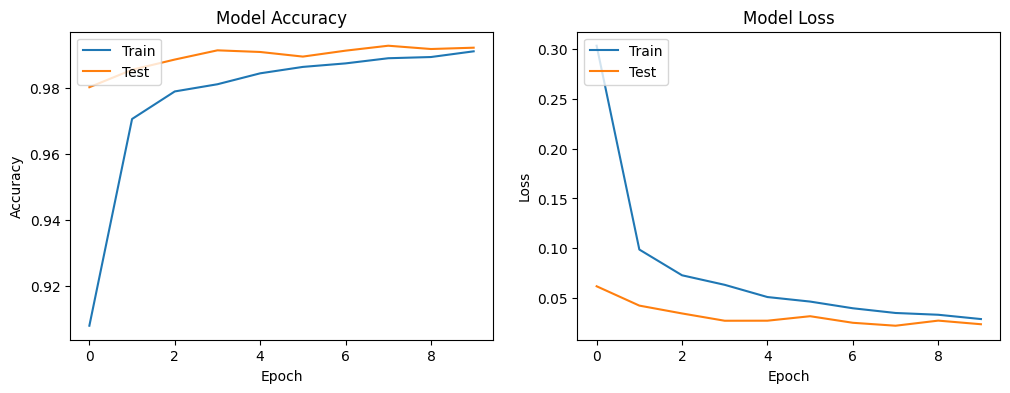

In [12]:
score = model.evaluate(x_test, y_test, verbose=0)
print(f"Test loss: {score[0]:.4f}")
print(f"Test accuracy: {score[1]*100:.2f}%")

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()